<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Detailed Examples: Data Collection, Parsing, and Quick Analyses

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
<hr style='height:2px'>

# Title

**Дополнительная практика + решения!**

# Описание

**Это упражнение не будет оцениваться, его даже нельзя сдать, и работать над ним совершенно необязательно**.

Но если вы хотите **дополнительной практики**, мы создали эту тетрадь, которая по своей сути очень похожа на домашнее задание. Более того, она очень похожа на реальные сценарии исследования и анализа данных - до моделирования.

Мы не включили автогрейдер, поэтому вы не сможете проверить свои решения. Однако мы предоставляем решения, чтобы вы могли вручную проверить, соответствуют ли ваши результаты нашим. **Решения видны на вкладке вверху (справа) в этом окне.**.**

In [2]:
## запустите эту ячейку, чтобы получить правильное форматирование
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2020-CS109A/master/themes/static/css/cs109.css").text
HTML(styles)

## Обзор 

Цель данного блокнота - получить дополнительную практику по получению, разбору, очистке и анализу данных. Поскольку для решения реальных задач часто требуется сбор информации из различных источников, в том числе и из Интернета, веб-скрепинг является весьма полезным навыком. 
Для этого мы будем собирать данные IMDb о самых высокооплачиваемых актерах и актрисах, извлекать различные ключевые точки данных и использовать PANDAS, чтобы научиться агрегировать эти данные полезным образом.

### Задачи обучения
- Начать работу с блокнотами Jupyter Notebooks, которые являются невероятно популярными, мощными и будут нашим средством программирования на протяжении всего курса CS109A и CS109B.
- Ознакомиться с методами поиска и использования данных из онлайн-источников.
- Приобрести опыт исследования и простого анализа данных.
- Ознакомиться с PANDAS как средством хранения и работы с данными.
- Чувствовать себя хорошо подготовленным к выполнению HW1.

### Примечания
- Упражнение **ответственный скраппинг**. Веб-серверы могут работать медленно или не реагировать на запросы, если они получают слишком много запросов от одного и того же источника за короткий промежуток времени. 

В своем коде используйте задержку между запросами в 2 секунды. Это поможет избежать блокировки целевого сайта - представьте, как обидно, когда это происходит. 

Раздел 1 этого домашнего задания предполагает сохранение отсканированных веб-страниц на локальной машине.


- Запросы на веб-скреппинг могут занимать несколько минут. В зависимости от проекта это может занять часы, дни или длиться бесконечно долго (Google ползает по всей Сети).
- При работе Jupyter Notebook сохраняет состояние памяти. Таким образом, порядок запуска ячеек имеет значение и играет решающую роль; 

в процессе разработки и тестирования кода можно легко допустить ошибки, основываясь на том, "когда" вы запускаете различные ячейки. 

**Перед выполнением каждого домашнего задания Jupyter Notebook обязательно перезагрузите Jupyter Notebook и запустите весь блокнот с нуля (т.е. "Kernel -> Restart & Run All")**.

In [3]:
# импортировать необходимые библиотеки
import re
import requests
import pandas as pd
import numpy as np
from time import sleep
from bs4 import BeautifulSoup

# Оглавление

0. Практика работы с regex
I. Получение данных IMDb
  1. Получение данных сайта через `запросы`
  2. BeautifulSoup
  3. Получение url актера + зарплата
  4. Соскрести остальные данные
II. Загрузка и изучение данных
  1. Сохранение и загрузка данных с помощью Pandas
  2. Очистка данных (переименование столбцов + изменение типов)
  3. Нарезка и сортировка данных
  4. Вычисление сводной статистики (min, max, mean и т.д.)
  5. `pd.cut`, `df.groupby` и гистограммы
  6. Исследование зависимости возраста от зарплаты
  7. Исследование зависимости зарплаты от пола
  8. Изучение соотношения премий и пола
  9. Исследование соотношения премий и секса, часть II
  10. Исследование композиторских кредитов

## 0. Практика работы с regex

Умение соскабливать, разбирать и анализировать простые данные веб-сайта очень полезно в самых разных ситуациях. Здесь мы рассмотрим голосование в Сенате США по вопросу утверждения кандидата на должность окружного судьи США: https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=116&session=2&vote=00157.

Мы предоставляем скраппинг. Ваша задача состоит в следующем:
1. Написать BeautifulSoup для захвата секции 'vote by positon' для обоих вариантов "Yea" и "Nay".
2. Напишите regex для извлечения имени каждого сенатора из разделов "За" и "Против".


In [4]:
url = "https://www.senate.gov/legislative/LIS/roll_call_votes/vote1162/vote_116_2_00157.htm"

# proxies = {
#     'http': "http://37.120.147.90:8081",
#     'https': "https://37.120.147.90.66:8081"
# }
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers, timeout=10)
response

<Response [200]>

Имена всех сенаторов

In [5]:
import re

from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.content, 'lxml')
soup

1. Теги: 
   - `<div>` - это тег блочного элемента, используется для группировки и структурирования содержимого.
   - `<span>` - это тег строчного элемента, используется для обозначения отдельной части текста или обертки для других элементов.
   
2. Классы: 
   - `newspaperDisplay_3column` - это класс, примененный к `<div>` элементу. Классы используются для определения стилей в CSS или для работы с элементами с помощью JavaScript.
   - `contenttext` - это класс, примененный к `<span>` элементу. Он используется для определения стилей, связанных с текстом, в CSS или для работы с элементом с помощью JavaScript.

3. Блоки: 
   - `<div class="newspaperDisplay_3column">` - это блок, заданный с использованием `<div>` элемента и класса "newspaperDisplay_3column". Он группирует содержимое, разбивая его на три столбца.
   - `<span class="contenttext">` - это блок, заданный с использованием `<span>` элемента и класса "contenttext". Он обычно используется для определенного текста или для добавления дополнительных стилей к тексту.


Просмотрев код страницы. я поняла, что нужная мне информация находится в блоке div, строчном теге span, классе **contenttext**



In [7]:
# <code>

# <div class="newspaperDisplay_3column" bis_skin_checked="1">
# <span class="contenttext">

# НУЖНЫЙ КОНТЕНТ (имена и голоса всех сенаторов)

# </span>
# </div>

# </code>

In [8]:
# судя по всему предмет разговора, это вот этот заголовок
title = soup.title
print(title.text)


U.S. Senate: U.S. Senate Roll Call Votes 116th Congress - 2nd Session


In [9]:
all_data = soup.find_all("span", class_ = 'contenttext')
# необрамленную массу инфы с тегами внутри выведем циклом
data_senators_cleaned = []
for item in all_data:
    data_senators_cleaned.append(item.text)
    print(item.text)
# или так (дословно, получить текст элемента name для элемента name в списке names и записать в список )
# data_senators_cleaned = [item.text for item in all_data]

Alexander (R-TN), Not Voting
Baldwin (D-WI), Nay
Barrasso (R-WY), Yea
Bennet (D-CO), Nay
Blackburn (R-TN), Not Voting
Blumenthal (D-CT), Nay
Blunt (R-MO), Yea
Booker (D-NJ), Nay
Boozman (R-AR), Yea
Braun (R-IN), Yea
Brown (D-OH), Nay
Burr (R-NC), Yea
Cantwell (D-WA), Nay
Capito (R-WV), Yea
Cardin (D-MD), Nay
Carper (D-DE), Nay
Casey (D-PA), Nay
Cassidy (R-LA), Yea
Collins (R-ME), Yea
Coons (D-DE), Nay
Cornyn (R-TX), Yea
Cortez Masto (D-NV), Nay
Cotton (R-AR), Yea
Cramer (R-ND), Yea
Crapo (R-ID), Yea
Cruz (R-TX), Yea
Daines (R-MT), Yea
Duckworth (D-IL), Not Voting
Durbin (D-IL), Nay
Enzi (R-WY), Yea
Ernst (R-IA), Yea
Feinstein (D-CA), Nay
Fischer (R-NE), Yea
Gardner (R-CO), Yea
Gillibrand (D-NY), Nay
Graham (R-SC), Yea
Grassley (R-IA), Yea
Harris (D-CA), Nay
Hassan (D-NH), Nay
Hawley (R-MO), Yea
Heinrich (D-NM), Nay
Hirono (D-HI), Nay
Hoeven (R-ND), Yea
Hyde-Smith (R-MS), Yea
Inhofe (R-OK), Yea
Johnson (R-WI), Yea
Jones (D-AL), Yea
Kaine (D-VA), Nay
Kennedy (R-LA), Yea
King (I-ME), Nay


Так вышло что это один элемент списка, (все имена можно получить по индексу 0) поэтому разобьем данные по \n

In [10]:
data_senators_cleaned = data_senators_cleaned[0].split('\n')
# на текущий момент это то что нам нужно

In [11]:
# просмотрим первые 4 элемента списка. думаю нужно 
# 1. сплит по пробелу, удалить запятую если она есть и  первый элемент в имя и так далее
data_senators_cleaned[:4]

['Alexander (R-TN), Not Voting',
 'Baldwin (D-WI), Nay',
 'Barrasso (R-WY), Yea',
 'Bennet (D-CO), Nay']

In [12]:
# Теперь наша задача состоит в том чтобы получить только имена. вероятно нужно создать финальный список а еще лучше словарь, в который нужно положить сплитнутую часть каждого элемента по пробелу
# senators_name, initials, vote - наши ключи, словари это наш value
name = []
init = []
vote = []
voting_data = {'senators_name': name, 'initials': init, 'votes': vote}

for item in data_senators_cleaned:
    splited_item = item.split(',')
    if len(splited_item) == 2:
        senator_info = splited_item[0].split('(')
        senator_name = senator_info[0].strip()
        senator_initial = senator_info[1].replace(')', '').strip()
        senator_vote = splited_item[1].strip()

        name.append(senator_name)
        init.append(senator_initial)
        vote.append(senator_vote)
        # чтобы не вылазило ошибок, сделаем это более юзерфрендли
    else:
        print(f"Неверный формат элемента: {item}")

# Проверка результатов
print(voting_data)

Неверный формат элемента: 
Неверный формат элемента: 
{'senators_name': ['Alexander', 'Baldwin', 'Barrasso', 'Bennet', 'Blackburn', 'Blumenthal', 'Blunt', 'Booker', 'Boozman', 'Braun', 'Brown', 'Burr', 'Cantwell', 'Capito', 'Cardin', 'Carper', 'Casey', 'Cassidy', 'Collins', 'Coons', 'Cornyn', 'Cortez Masto', 'Cotton', 'Cramer', 'Crapo', 'Cruz', 'Daines', 'Duckworth', 'Durbin', 'Enzi', 'Ernst', 'Feinstein', 'Fischer', 'Gardner', 'Gillibrand', 'Graham', 'Grassley', 'Harris', 'Hassan', 'Hawley', 'Heinrich', 'Hirono', 'Hoeven', 'Hyde-Smith', 'Inhofe', 'Johnson', 'Jones', 'Kaine', 'Kennedy', 'King', 'Klobuchar', 'Lankford', 'Leahy', 'Lee', 'Loeffler', 'Manchin', 'Markey', 'McConnell', 'McSally', 'Menendez', 'Merkley', 'Moran', 'Murkowski', 'Murphy', 'Murray', 'Paul', 'Perdue', 'Peters', 'Portman', 'Reed', 'Risch', 'Roberts', 'Romney', 'Rosen', 'Rounds', 'Rubio', 'Sanders', 'Sasse', 'Schatz', 'Schumer', 'Scott', 'Scott', 'Shaheen', 'Shelby', 'Sinema', 'Smith', 'Stabenow', 'Sullivan', 'Tester

В этом коде мы проходимся по каждому элементу в data_senators_cleaned.

1. splited_item = item.split(',') разделяет элемент по запятым, создавая список из имени и голоса сенатора.
2. Затем мы проверяем длину разделенного элемента. Если длина равна 2, значит, имеем правильный формат элемента.
3. Далее мы разделяем имя сенатора и его инициалы, используя открывающую скобку '(' в списке senator_info.
4. Мы очищаем имя и инициалы, удаляя лишние пробелы вокруг них и удаляя закрывающую скобку ')' в инициалах.
5. Голос сенатора сохраняется в переменную senator_vote.
6. Мы добавляем имя, инициалы и голос в соответствующие списки name, init и vote.
7. В противном случае, если формат элемента неверный, мы выводим соответствующее сообщение.

Обратите внимание, что этот код ожидает, что data_senators_cleaned является списком строк, и элементы содержат имя и инициалы сенатора, разделенные открывающей скобкой '(', и голосом, разделенным запятой ','

ПОДРОБНЕЕ:
1. Создание пустых списков name, init и vote, а также словаря voting_data, где name, init и vote будут использоваться в качестве ключей, а пустые списки - в качестве значений для ключей.
2. Начало цикла for, где каждый элемент из списка data_senators_cleaned будет последовательно обрабатываться.
3. Разбиение элемента на две части по запятой с помощью split(','), чтобы получить список splited_item, содержащий имя сенатора и голос.
4. Проверка, что длина splited_item равна 2, что указывает на правильный формат элемента.
5. Внутри условного оператора if, разделение имени сенатора и его инициалов, используя открывающую скобку ( в списке senator_info. Распаковка имени и инициалов, аккуратное удаление скобок и удаление лишних пробелов с помощью методов strip() и replace().
6. Получение голоса сенатора из второй части элемента с помощью strip(), чтобы удалить лишние пробелы с начала и конца строки.
7. Добавление имени, инициалов и голоса в соответствующие списки name, init и vote с помощью методов append().
8. Если формат элемента неверный, в пункте else выводится сообщение с некорректным форматом элемента.
9. Конец цикла for, при этом все элементы исходного списка обработаны.
10. Вывод voting_data, словаря, содержащего списки имен, инициалов и голосов сенаторов.

Результатом выполнения данного кода будет словарь voting_data, в котором ключи senators_name, initials и votes будут содержать соответствующие списки с данными о сенаторах.

Пожалуйста, обратите внимание, что этот код предполагает определенный формат входных данных и ожидает, что элементы в data_senators_cleaned будут соответствовать этому формату. Если формат данных отличается, возможно, потребуется внести изменения в код для правильной обработки ваших данных.

In [13]:
for i in range(len(vote)):
    if vote[i] == 'Yea':
        vote[i] = 'Yes'
    elif vote[i] == 'Nay':
        vote[i] = 'No'

In [14]:
# for name_val, init_val, vote_val in zip(name, init, vote):
#     print(f"Name: {name_val}    Initials: {init_val}    Vote: {vote_val}")

In [15]:
import pandas as pd
df = pd.DataFrame(voting_data)
df

,senators_name,initials,votes
0,Alexander,R-TN,Not Voting
1,Baldwin,D-WI,No
2,Barrasso,R-WY,Yes
3,Bennet,D-CO,No
4,Blackburn,R-TN,Not Voting
...,...,...,...
95,Warren,D-MA,No
96,Whitehouse,D-RI,No
97,Wicker,R-MS,Yes
98,Wyden,D-OR,No


In [16]:
df[['votes']].value_counts()

votes     
Yes           55
No            42
Not Voting     3
dtype: int64

In [17]:
df.to_csv('voting_data.csv', sep = ',', header = True, index=False)

2. Напишите regex для извлечения имени каждого сенатора из разделов "За" и "Против".

In [18]:
# это решилось гораздо проще, но регулярки оставлю на потом

**Объяснение regex:** `'\)(.*?)\s\('`)

Я заметил, что имена были перечислены между скобками, например, `...)Barrasso (R...`. Поэтому я решил искать текст между скобками с пробелом перед открытыми скобками, т.е. `)abc (`. 

Регекс-поиск возвращает список всех совпадений со следующим условием: совпадает любая строка любой длины, которая идет после ")", но до " (".

![](https://i.imgur.com/5wiR1jn.png)

## 1. Получение данных IMDb

В данном случае нас интересует анализ нескольких точек данных об известных актерах и актрисах на сайте IMDb. IMDb предоставляет соответствующие данные, включающие имена, пол и различные награды актеров и актрис. Посетив сайт https://www.imdb.com/list/ls026028927/, вы найдете список самых высокооплачиваемых актеров и актрис. Каждый актер 

В этом упражнении мы сосредоточимся на автоматизации загрузки данных о каждом актере (с помощью ``запросов''). Сначала, как и для каждого Jupyter Notebook, импортируем необходимые пакеты, которые будем использовать в блокноте (т.е. запустим ячейку ниже)

In [19]:
# Мы определяем это для удобства, так как URL каждого актера начинается с этого префикса
base_url = 'https://www.imdb.com'
extension = '/list/ls026028927/'

Здесь мы получаем веб -страницу и строим из нее объект BeautifulSoup (HTML -анализатор).

In [ ]:
actors_page = requests.get(base_url + extension)
bs_page = BeautifulSoup(actors_page.content, "html.parser")
bs_page

<div class='exercise'><b> Exercise 1.1:</b>
    
В ячейке ниже напишите код, который использует объект BeautifulSoup для разбора главной страницы, чтобы извлечь **ссылку и зарплату** для каждого актера. В частности, заполните словарь `info`, задав для каждого ключа имя актера, а для значения - **словарь данных**, с ключами `url` и `salary`. После завершения работы в словаре `info` будет 30 ключей. Например, внутри `info` одна из пар <ключ-значение> должна быть такой:

``'Adam Sandler': {'salary': '$50.5 million',
  'url': 'https://www.imdb.com/name/nm0001191'}``

**HINT:** Существует _множество_ решений, но вам может показаться, что проще всего использовать регулярное выражение (выражения)
</div>



все находится в тегe **div**, класс **lister-item-content** и актеры нумерованы

<!-- <span class="lister-item-index unbold text-primary">2. </span>
<a href="/name/nm0425005?ref_=nmls_hd"> Dwayne Johnson -->

имена находятся в тегах a

тект находтся в тегах p
<!-- <p>
Dwayne Douglas Johnson, also known as The Rock, was born on May 2, 1972 in Hayward, California. He is the son of <a href="/name/nm1696097?ref_=nmls_mkdn">Ata Johnson</a> (born Feagaimaleata Fitisemanu) and professional wrestler <a href="/name/nm0426117?ref_=nmls_mkdn">Rocky Johnson</a> (born Wayde Douglas Bowles). His father, from Amherst, Nova Scotia, Canada, is black (of Black Nova ...   
             </p> -->


для начала попробуем получить доступ к первому актеру

In [21]:
first = bs_page.find("div", class_='lister-item-content')
first.text

'\n\n1. \n Mark Wahlberg\n \n\n                        Producer |\n The Fighter\n \n\nAmerican actor Mark Wahlberg is one of a handful of respected entertainers who successfully made the transition from teen pop idol to acclaimed actor. A Best Supporting Actor Oscar nominee for The Departed (2006) who went on to receive positive critical reviews for his performance in The Fighter (...                \n'

Окей, мы получили какие то данные по Mark Wahlberg. Но по видимому, я не захватила весь блок. смотрим:

In [22]:
# <div class="lister-item mode-detail" bis_skin_checked="1">
#         <div class="lister-item-image" bis_skin_checked="1">
# <a href="/name/nm0000242/?ref_=nmls_pst"> <img alt="Mark Wahlberg" height="209" src="https://m.media-amazon.com/images/M/MV5BMTU0MTQ4OTMyMV5BMl5BanBnXkFtZTcwMTQxOTY1NA@@._V1_UY209_CR10,0,140,209_AL_.jpg" width="140">
# </a>        </div>
#         <div class="lister-item-content" bis_skin_checked="1">
#             <h3 class="lister-item-header">
#                 <span class="lister-item-index unbold text-primary">1. </span>
# <a href="/name/nm0000242?ref_=nmls_hd"> Mark Wahlberg
# </a>            </h3>
#                 <p class="text-muted text-small">
#                         Producer <span class="ghost">|</span>
# <a href="/title/tt0964517/?ref_=nmls_kf"> The Fighter
# </a>                </p>
#                 <p>
# American actor Mark Wahlberg is one of a handful of respected entertainers who successfully made the transition from teen pop idol to acclaimed actor. A Best Supporting Actor Oscar nominee for <a href="/title/tt0407887?ref_=nmls_mkdn">Отступники</a> (2006) who went on to receive ...                </p>
#         </div>
#         <div class="clear" bis_skin_checked="1"></div>
# <div class="list-description" bis_skin_checked="1"><p>$68 million</p></div>    </div>

In [23]:
#  так лучше. где то в конце, мы все таки захватили заработную плату, значит класс мы сейчас определили верно
first = bs_page.find("div", class_='lister-item mode-detail')
first

<div class="lister-item mode-detail">
<div class="lister-item-image">
<a href="/name/nm0000242/"> <img alt="Mark Wahlberg" height="209" src="https://m.media-amazon.com/images/M/MV5BMTU0MTQ4OTMyMV5BMl5BanBnXkFtZTcwMTQxOTY1NA@@._V1_UY209_CR10,0,140,209_AL_.jpg" width="140"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1. </span>
<a href="/name/nm0000242"> Mark Wahlberg
</a> </h3>
<p class="text-muted text-small">
                        Producer <span class="ghost">|</span>
<a href="/title/tt0964517/"> The Fighter
</a> </p>
<p>
American actor Mark Wahlberg is one of a handful of respected entertainers who successfully made the transition from teen pop idol to acclaimed actor. A Best Supporting Actor Oscar nominee for <a href="/title/tt0407887">The Departed</a> (2006) who went on to receive positive critical reviews for his performance in <a href="/title/tt0964517">The Fighter</a> (...                </p

`info` - это словарь словарей, где ключи это Имена актеров и вложенные в них словари, с ключами `url` и `salary`

Вот так: 
``'Adam Sandler': {'salary': '$50.5 million',
  'url': 'https://www.imdb.com/name/nm0001191'}``

для url и зарплаты и правда нужно воспользоваться  регулярками, хотя ссылку попробуем извлечь по другому, плюс она состоит из 2 частей, поэтому придется мерджить

# Актер или актриса

In [24]:
# h3 p text-muted text-small
credits = first.find('p', class_= 'text-muted text-small')
credits = credits.text.strip().split()[0]
credits

'Producer'

# ССылка

In [25]:
#  <a href="/name/nm0000242/?ref_=nmls_pst"> <img alt="Mark Wahlberg" 
link_part2 = first.find('a')['href']
# окей, дернули из содержимого предыдущего поиска часть нашей ссылки
# конкатенируем с базой и проверяем
link = base_url+link_part2 
link
# отлично, ссылка рабочая, ведет куда нужно


'https://www.imdb.com/name/nm0000242/'

# Зарплата

In [26]:
# <div class="list-description"><p>$68 million</p></div> </div>
salary = first.find('div', class_= 'list-description')
salary.text
# ура. С даступом мы разобрались


'$68 million'

# Имя

In [27]:
# дословно найти в теге h3 классе lister-item-header тег а, из которого взять текст и на всякий случай сплитнуть пробелы
name = first.find('h3', class_='lister-item-header').find('a').text.strip()
name

'Mark Wahlberg'

# Теперь наша задача сделать так чтобы оно находило все записи через find all и проделывало то что мы делали вручную

In [28]:
# получим доступ ко всем блокам всех актеров и сохраним их в список
actors_list_not_cleaned = bs_page.find_all("div", class_='lister-item mode-detail')
#  так мы все получили. теперь это список объектов по которым мы будем итерировать
actors_list_not_cleaned[2]


<div class="lister-item mode-detail">
<div class="lister-item-image">
<a href="/name/nm0004874/"> <img alt="Vin Diesel" height="209" src="https://m.media-amazon.com/images/M/MV5BMjExNzA4MDYxN15BMl5BanBnXkFtZTcwOTI1MDAxOQ@@._V1_UY209_CR5,0,140,209_AL_.jpg" width="140"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">3. </span>
<a href="/name/nm0004874"> Vin Diesel
</a> </h3>
<p class="text-muted text-small">
                        Actor <span class="ghost">|</span>
<a href="/title/tt2015381/"> Guardians of the Galaxy
</a> </p>
<p>
Vin Diesel was born Mark Sinclair in Alameda County, California, along with his fraternal twin brother, <a href="/name/nm0898731">Paul Vincent</a>. He was raised by his astrologer/psychologist mother, Delora Sherleen (Sinclair), and adoptive father, Irving H. Vincent, an acting instructor and theatre manager, in an artists' ...                </p>
</div>
<div class="clear"></di

In [29]:
actors_names =  []
urls = []
salarys_millions = []
position_list= []
for item in actors_list_not_cleaned:
    # нам нужно имя
    name = item.find('h3', class_='lister-item-header').find('a').text.strip()
    actors_names.append(name)
    # нам нужно понять кто он такой и как себя позиционирует
    position = item.find('p', class_= 'text-muted text-small').text.strip().split()[0]
    position_list.append(position)
    # нам нужна ссылка
    link = base_url + item.find('a')['href']
    urls.append(link)
    # нам нужна зарплата
    salary = item.find('div', class_= 'list-description').text # зп
    salarys_millions.append(salary)
    
    

In [30]:
print(actors_names)
print(urls)
print(salarys_millions)
print(position_list)

['Mark Wahlberg', 'Dwayne Johnson', 'Vin Diesel', 'Adam Sandler', 'Jackie Chan', 'Robert Downey Jr.', 'Tom Cruise', 'Shah Rukh Khan', 'Salman Khan', 'Akshay Kumar', 'Chris Hemsworth', 'Tom Hanks', 'Samuel L. Jackson', 'Ryan Gosling', 'Emma Stone', 'Jennifer Aniston', 'Jennifer Lawrence', 'Ryan Reynolds', 'Matt Damon', 'Jeremy Renner', 'Chris Evans', 'Melissa McCarthy', 'Chris Pratt', 'Mila Kunis', 'Emma Watson', 'Charlize Theron', 'Mark Ruffalo', 'Cate Blanchett', 'Julia Roberts', 'Amy Adams']
['https://www.imdb.com/name/nm0000242/', 'https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0004874/', 'https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0000375/', 'https://www.imdb.com/name/nm0000129/', 'https://www.imdb.com/name/nm0451321/', 'https://www.imdb.com/name/nm0006795/', 'https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0000158/', 'https://www.imdb.co

Сразу пробежимся по списук зарплат удалим значки доллара и все что не цифры

In [31]:
# Поступим как чайники и просто реплейснем все слова так как они одинаковы , ну и значки доллара
salarys_millions = [salary.replace('$', '').replace('million', '').strip() for salary in salarys_millions]
# Вывод очищенного спискаprint(salarys_cleaned)
# salarys_millions

# Так как нигде нет пола, будем хитрить. если Actor и Produser - male,  иначе female

In [32]:
sex_list = []
for item in position_list:
    if item == 'Producer' or item == 'Actor':
        sex_list.append('male')
    else:
        sex_list.append('female')
        


# Время собрать все в словари

In [33]:
# actors_dict = {'actors_name': name, 'salary': salary, 'url': url}
# это будет наш список словарей
actors_data=[]
for name, sex, position, salary, url in zip(actors_names, sex_list, position_list, salarys_millions, urls):
    # добавить в список словарь переменным значениям которого будут присваиваться текущие значения итерируемых переменных
    actors_data.append({'actors_name': name, 'sex': sex, 'position': position,'salary': salary, 'url': url})

In [34]:
#  так как это список словарей, можем посмотреть на какой то конкретный элемент по индексу
actors_data[1]


{'actors_name': 'Dwayne Johnson',
 'sex': 'male',
 'position': 'Actor',
 'salary': '65',
 'url': 'https://www.imdb.com/name/nm0425005/'}

In [35]:
#  так как внутри у нас в любом элементе списка есть словарь, к его элементам можно обращаться по ключу
actors_data[1]['actors_name']

'Dwayne Johnson'

In [36]:
# проверим. красота
act_data = pd.DataFrame(actors_data)
act_data.head()

,actors_name,sex,position,salary,url
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/
4,Jackie Chan,male,Actor,49,https://www.imdb.com/name/nm0000329/


# Усложним задачу. изучим краткое инфа по актеру и разберемся, что можно еще вытащить
у каждого актера есть минибио, которое находится по ссылке на него. нужно просмотреть все ли там одинаково, ибо есть еще одна чать ссылки

после нее доставляется третья часть `bio/?ref_=nm_ov_bio_sm`

In [37]:
# Забьем это в наш датафрейм на всякий случай)
act_data['short_bio_url'] = act_data['url']+'bio/?ref_=nm_ov_bio_sm'
act_data.head()

,actors_name,sex,position,salary,url,short_bio_url
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...
4,Jackie Chan,male,Actor,49,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...


**На каждой странице есть краткое Overview**

Born June 5, 1971 · Dorchester, Boston, Massachusetts, USA

Birth name Mark Robert Michael Wahlberg

Nicknames Marky MarkMonk D

Height 1.73 m

***В конце состав семьи и иное ***

**Посмотрим сначала на Overview, который на странице выглядит примерно так (структура не сохранена)**

In [38]:
# <div data-testid="sub-section-overview" class="sc-f65f65be-0 fVkLRr" bis_skin_checked="1"><ul class="ipc-metadata-list ipc-metadata-list--dividers-between sc-c1dc6938-0 czYoHO meta-data-list-full ipc-metadata-list--base" role="presentation">
# <li role="presentation" class="ipc-metadata-list__item" id="born" data-testid="list-item"><span class="ipc-metadata-list-item__label" aria-disabled="false">Born</span><div class="ipc-metadata-list-item__content-container" bis_skin_checked="1">
# <div class="ipc-html-content ipc-html-content--base ipc-html-content--display-inline" role="presentation" bis_skin_checked="1">
# <div class="ipc-html-content-inner-div" bis_skin_checked="1"><a href="/search/name/?birth_monthday=6-5&amp;refine=birth_monthday&amp;ref_=nmbio_ov_born_monthday">June 5</a>, 
# <a href="/search/name/?birth_year=1971&amp;ref_=nmbio_ov_born_year">1971</a> · <a href="/search/name/?birth_place=Dorchester, Boston, Massachusetts, USA&amp;ref_=nmbio_ov_born_location">Dorchester, Boston, Massachusetts, USA</a>
# </div></div></div></li><li role="presentation" class="ipc-metadata-list__item" id="name" data-testid="list-item"><span class="ipc-metadata-list-item__label" aria-disabled="false">Birth name</span><div class="ipc-metadata-list-item__content-container" bis_skin_checked="1"
# <div class="ipc-html-content ipc-html-content--base ipc-html-content--display-inline" role="presentation" bis_skin_checked="1"><div class="ipc-html-content-inner-div" bis_skin_checked="1">Mark Robert Michael Wahlberg</div>
# </div></div></li><li role="presentation" class="ipc-metadata-list__item" id="nicknames" data-testid="list-item"><span class="ipc-metadata-list-item__label" aria-disabled="false">Nicknames</span><div class="ipc-metadata-list-item__content-container" bis_skin_checked="1">
# <ul class="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content base" role="presentation"><li role="presentation" class="ipc-inline-list__item"><span class="ipc-metadata-list-item__list-content-item" aria-disabled="false">Marky Mark</span></li>
# <li role="presentation" class="ipc-inline-list__item"><span class="ipc-metadata-list-item__list-content-item" aria-disabled="false">Monk D</span></li></ul><div class="ipc-html-content ipc-html-content--base ipc-html-content--display-inline" role="presentation" bis_skin_checked="1"></div>
# </div></li><li role="presentation" class="ipc-metadata-list__item" id="height" data-testid="list-item"><span class="ipc-metadata-list-item__label" aria-disabled="false">Height</span><div class="ipc-metadata-list-item__content-container" bis_skin_checked="1">
# <div class="ipc-html-content ipc-html-content--base ipc-html-content--display-inline" role="presentation" bis_skin_checked="1"><div class="ipc-html-content-inner-div" bis_skin_checked="1">1.73 m</div></div></div></li></ul></div>

In [39]:
# получим контент нужного элемента пока одного конкатенируя ссылку со словаря которые мы спарсили с третьей частью
Mark_Wahlberg_page = requests.get(urls[0]+'bio/?ref_=nm_ov_bio_sm')
MW_bs_page = BeautifulSoup(Mark_Wahlberg_page.content, "html.parser")
MW_bs_page
# получаем 403. чиним


<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

In [40]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
Mark_Wahlberg_page = requests.get(urls[0]+'bio/?ref_=nm_ov_bio_sm', headers = headers)
MW_bs_page = BeautifulSoup(Mark_Wahlberg_page.content, "html.parser")
MW_bs_page
# отлично

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1690010778716);
        }
    })</script><title>Mark Wahlberg - Biography - IMDb</title><meta content="Mark Wahlberg. Producer: The Fighter. American actor Mark Wahlberg is one of a handful of respected entertainers who successfully made the transition from teen pop idol to acclaimed actor. A Best Supporting Ac

<div class='exercise'><b> Exercise 1.2:</b>
    
В ячейке ниже напишите код, который использует объект BeautifulSoup для разбора url каждого актера, чтобы извлечь эти дополнительные переменные и добавить их в `info`:
- birth date
- sex
- height
- producer credits
- actor credits
- soundtrack credits
- composer credits
- award wins
- award nominations

Сохраните это в виде фрейма данных Pandas с именем `df`, где каждая строка представляет конкретного актера. Проверьте `df.shape`: у вас должно быть 30 строк и 11 столбцов.

**HINT:** Чтобы получить информацию о победах и номинациях, вы можете добавить `'/awards'` к вашему url и запросить эту ссылку. Не забывайте об ответственном подходе к порсингу!

**HINT:** Актерские кредиты перечислены в разделе "Актер" для мужчин и "Актриса" для женщин. Убедитесь, что вы спарсили правильно.

</div>

In [41]:
# Найти элемент со всей необходимой информацией
section_element = MW_bs_page.find('section', class_='ipc-page-section--base')
section_element.text

'OverviewBornJune 5, 1971 · Dorchester, Boston, Massachusetts, USABirth nameMark Robert Michael WahlbergNicknamesMarky MarkMonk DHeight5′ 8″ (1.73 m)'

In [42]:
# # Вся нужная нам информация о рождении есть в теге  div, класса ipc-html-content-inner-div, теге а href
# block_info = MW_bs_page.find('div', class_='ipc-html-content-inner-div').find_all('a')
# for item in block_info:
#     print(item.text)
# 

In [43]:
# Найти элемент с датой рождения (<li role="presentation" class="ipc-metadata-list__item" id="born" data-testid="list-item">)
born_element = section_element.find('li', id='born')
# найдем все теги а
born_date_place = born_element.find_all('a')
# проитерируем по стписку в котором хранятся все теги а этого блока и сохраним его в список 
dates_and_place = [date.text for date in born_date_place]
# проверка
dates_and_place

['June 5', '1971', 'Dorchester, Boston, Massachusetts, USA']

In [44]:

# Найти элемент с именем при рождении
birth_name_element = section_element.find('li', id='name')
birth_name = birth_name_element.find('div', class_='ipc-html-content-inner-div').text
birth_name

'Mark Robert Michael Wahlberg'

In [45]:
# Найти элементы с никнеймами
nicknames_element = section_element.find('li', id='nicknames')
nicknames_list = nicknames_element.find_all('span', class_='ipc-metadata-list-item__list-content-item')
nicknames = [nickname.text for nickname in nicknames_list]
nicknames

['Marky Mark', 'Monk D']

In [46]:
# Найти элемент с ростом
height_element = section_element.find('li', id='height')
height = height_element.find('div', class_='ipc-html-content-inner-div').text


In [47]:
# Вывести найденную информацию
print("Дата рождения:", dates_and_place)
print("Имя при рождении:", birth_name)
print("Никнеймы:", nicknames)
print("Рост:", height)

Дата рождения: ['June 5', '1971', 'Dorchester, Boston, Massachusetts, USA']
Имя при рождении: Mark Robert Michael Wahlberg
Никнеймы: ['Marky Mark', 'Monk D']
Рост: 5′ 8″ (1.73 m)


In [48]:
# напоминашка
act_data.head(1)

,actors_name,sex,position,salary,url,short_bio_url
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...


# Добавим по всем актерам:

In [49]:
birth_date_list = []
bitrh_year_list = []
place_of_birth_list = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
# наш список urls по нему нужно итерировать получая и итератор (индекс) и сам элемент
# когда страница конкретного url извлечена, сразу парсим оттуда все необходимые данные 
for index, page in enumerate(urls):
    current_page = requests.get(urls[index]+'bio/?ref_=nm_ov_bio_sm', headers = headers)
    page = BeautifulSoup(current_page.content, "html.parser")
    # найдем секцию
    section = page.find('section', class_='ipc-page-section--base')
    # Найти элемент с датой рождения (<li role="presentation" class="ipc-metadata-list__item" id="born" data-testid="list-item">)
    born_element = section.find('li', id='born')
    # найдем все теги а
    born_date_place = born_element.find_all('a')
    # проитерируем по стписку в котором хранятся все теги а этого блока и сохраним его в список 
    dates_and_place = [date.text for date in born_date_place]
    # формат ['June 5', '1971', 'Dorchester, Boston, Massachusetts, USA']
    birth_date_list.append(dates_and_place[0])
    bitrh_year_list.append(dates_and_place[1])  
    place_of_birth_list.append(dates_and_place[2])
    # Найти элемент с именем при рождении
 


# Тестовая ячейка

In [50]:
# headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
#     }
# test_page = requests.get(urls[3]+'bio/?ref_=nm_ov_bio_sm', headers = headers)
# response = BeautifulSoup(test_page.content, "html.parser")
#      # отлично
#     # Найти элемент со всей необходимой информацией
# section_element = response.find('section', class_='ipc-page-section--base')
#     # Найти элемент с именем при рождении
# birth_name_element = section_element.find('li', id='name')
# birth_name = birth_name_element.find('div', class_='ipc-html-content-inner-div').text
# # birth_name_list.append(birth_name)
    

#     # Найти элементы с никнеймами
# nicknames_element = section_element.find('li', id='nicknames')
# nicknames_list = nicknames_element.find_all('span', class_='ipc-metadata-list-item__list-content-item')
# nicknames = [nickname.text for nickname in nicknames_list]
# # all_nicknames_list.append(nicknames)
   

#     # Найти элемент с ростом
# height_element = section_element.find('li', id='height')
# height = height_element.find('div', class_='ipc-html-content-inner-div').text
# # height_list.append(height)
#     # Вывести найденную информацию
# print("Дата рождения:", dates_and_place)
# print("Имя при рождении:", birth_name)
# print("Никнеймы:", nicknames)
# print("Рост:", height)

In [51]:
birth_name_list = []
all_nicknames_list =[]
height_list = []
for index in range(len(urls)):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    }
    test_page = requests.get(urls[index]+'bio/?ref_=nm_ov_bio_sm', headers=headers)
    response = BeautifulSoup(test_page.content, "html.parser")
       # Найти элемент со всей необходимой информацией
    section_element = response.find('section', class_='ipc-page-section--base')
    # Найти элемент с именем при рождении
    birth_name_element = section_element.find('li', id='name')
    # прикол в том, что вероятно не у всех есть никнеймы, в этом нужно убедится, но оно сильно ругается на find all()
    if birth_name_element:
        birth_name_div = birth_name_element.find('div', class_='ipc-html-content-inner-div')
        if birth_name_div:
            birth_name = birth_name_div.text
        else:
            birth_name = 'No data available'
    else:
        birth_name = 'No data available'
    birth_name_list.append(birth_name)
        

        # Найти элементы с никнеймами
    nicknames_element = section_element.find('li', id='nicknames')
    if nicknames_element:
        nicknames_list = nicknames_element.find_all('span', class_='ipc-metadata-list-item__list-content-item')
        nicknames = [nickname.text for nickname in nicknames_list]
        all_nicknames_list.append(nicknames)
    else:
        all_nicknames_list.append([])
    

        # Найти элемент с ростом
    height_element = section_element.find('li', id='height')
    height = height_element.find('div', class_='ipc-html-content-inner-div').text
    height_list.append(height)

# Добавим все в таблицу


In [52]:
# act_data.drop('birth_date', axis=1, inplace=True)

In [53]:
act_data.head(2)

,actors_name,sex,position,salary,url,short_bio_url
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...


In [54]:
# Проверим длину списков

In [55]:
print(len(birth_date_list))
print(len(bitrh_year_list))
print(len(place_of_birth_list))
print(len(birth_name_list))
print(len(height_list))
print(len(all_nicknames_list))
print(len(urls)) 
     

30
30
30
30
30
30
30


In [56]:
act_data.shape

(30, 6)

In [57]:
# act_data.drop('birth_date', axis=1, inplace=True)
# act_data.drop('birth_year', axis=1, inplace=True)
# act_data.drop('place_of_birth', axis=1, inplace=True)

In [58]:
for i, (birth_date, birth_year, place_of_birth) in enumerate(zip(birth_date_list, bitrh_year_list, place_of_birth_list)):
    act_data.at[i, 'birth_date'] = birth_date
    act_data.at[i, 'birth_year'] = birth_year
    act_data.at[i, 'place_of_birth'] = place_of_birth
    

или

In [59]:
# for i, (birth_date, birth_year, place_of_birth) in enumerate(zip(birth_date_list, bitrh_year_list, place_of_birth_list)):
#     act_data.loc[i, ['birth_date', 'birth_year', 'place_of_birth']] = birth_date, birth_year, place_of_birth

In [60]:
act_data.head()

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA"
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA"
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA"
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA"
4,Jackie Chan,male,Actor,49,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong"


In [61]:
# # РОСТ нам нужны метры, так как в других штуках я вообще не але
import re
cleaned_heights = []

for height in height_list:
    # пробежимся по листу и поищем то что в скобках
    meters = re.findall(r'\((.*?)\)', height)
    # если находим, то добавляем, а мы находим)
    if meters:
        cleaned_heights.append(meters[0])
# ну и удалим лишние жлементы которые помешают нам преобразовать все в цифры
height_list = [str(height).replace('m','').strip() for height in cleaned_heights]
print(height_list)

['1.73', '1.96', '1.82', '1.77', '1.72', '1.73', '1.70', '1.69', '1.69', '1.78', '1.91', '1.83', '1.89', '1.84', '1.68', '1.64', '1.75', '1.88', '1.78', '1.74', '1.83', '1.57', '1.88', '1.63', '1.65', '1.77', '1.73', '1.74', '1.73', '1.63']


In [62]:
for i, (birth_name, height) in enumerate(zip(birth_name_list, height_list)):
    act_data.at[i, 'birth_name'] = birth_name
    act_data.at[i, 'height'] = height
    


In [63]:
act_data.head()

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA",Mark Sinclair,1.82
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA",Adam Richard Sandler,1.77
4,Jackie Chan,male,Actor,49,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong",Kong-sang Chan,1.72


In [64]:
# Приводим пустые списки к значению NaN
all_nicknames_list = [nicknames if nicknames else np.nan for nicknames in all_nicknames_list]
new_list = [str(item).strip('[]').strip("'").strip('"').replace("'", "").replace('"','') for item in all_nicknames_list]
# Добавляем список в столбец nicknames' в act_data
act_data['nicknames'] = new_list

In [65]:
# act_data.drop('nicknames', axis=1, inplace=True)

In [66]:
act_data.head(2)

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames
0,Mark Wahlberg,male,Producer,68,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D"
1,Dwayne Johnson,male,Actor,65,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre..."


Так. нам надо добавить столбец ВОЗРАСТ и что то случилось опять со столбцом роста(появились дюймы) так же очистить от скобок никнеймы

1. Получение текущей даты:
```python
import pandas as pd
from datetime import datetime

current_date = datetime.today().date()
print(current_date)
```

2. Получение текущего времени:
```python
current_time = datetime.today().time()
print(current_time)
```

3. Получение текущей даты и времени:
```python
current_datetime = datetime.today()
print(current_datetime)
```

4. Создание столбца датафрейма, содержащего текущую дату:
```python
act_data['current_date'] = pd.to_datetime('today').date()
print(act_data)

5. Получение года
current_year = pd.Timestamp.now().year
print(current_year)
```
В этом примере мы используем `pd.to_datetime('today')`, чтобы получить текущую дату и время, а затем преобразуем его в тип `date` с помощью `.date()` и добавляем в столбец `'current_date'` в `act_data`.

In [67]:
act_data.dtypes

actors_name       object
sex               object
position          object
salary            object
url               object
short_bio_url     object
birth_date        object
birth_year        object
place_of_birth    object
birth_name        object
height            object
nicknames         object
dtype: object

In [68]:
# переведем в инты
act_data[['birth_year']] = act_data[['birth_year']].astype('int')
# заодно и иные показатели
act_data[['salary']] = act_data[['salary']].astype('float')
act_data[['height']] = act_data[['height']].astype('float')

In [69]:
# выдает ошибку, так как формат нашего года это строка. проверим, поменяем, сделаем снова
act_data[['age']]=pd.Timestamp.now().year-act_data[['birth_year']]
# готово

По хорошему, лучше проработать и дату, мало ли мне будет интересно в какой месяц должен родиться актер чтобы столько зарабатывать, но это позднее. так или иначе, если бы дата была в формате DD.MM.YYYY
вычислить информацию о возрасте будет проще и все будет гораздо точнее

In [70]:
act_data.head()

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52
1,Dwayne Johnson,male,Actor,65.0,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre...",51
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA",Mark Sinclair,1.82,nan,56
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA",Adam Richard Sandler,1.77,Sandman,57
4,Jackie Chan,male,Actor,49.0,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong",Kong-sang Chan,1.72,"Yuen Lo, Sing Lung, Pao Pao, Kung-Fu Master",69


# Награды

In [ ]:
# взяли какую то часть информации. поишем дальше. Награды
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
rewards_page = requests.get(urls[0]+'awards', headers = headers)
parce_page = BeautifulSoup(rewards_page.content, "html.parser")
parce_page



In [72]:
# блок обернут в <div class="sc-c7c3a435-1 NixYx ipc-page-grid__item ipc-page-grid__item--span-2"
# дальше идут секции <section class="ipc-page-section ipc-page-section--base">
# в секциях нам интересен текст <h3 class="ipc-title__text"><span id="ev0000003">Academy Awards, USA</span>
section_element_rewards = parce_page.find('div', class_='sc-c7c3a435-1 NixYx ipc-page-grid__item ipc-page-grid__item--span-2')
section_element_rewards
h3_list = section_element_rewards.find_all('h3',class_='ipc-title__text')
nomonation_list =[list.text for list in h3_list]
nomonation_list


['Academy Awards, USA',
 'Primetime Emmy Awards',
 'BAFTA Awards',
 'Satellite Awards',
 'Razzie Awards',
 'News & Documentary Emmy Awards',
 'International Documentary Association',
 'PGA Awards',
 "People's Choice Awards, USA",
 'Black Reel Awards for Television',
 'Realscreen Awards',
 'Teen Choice Awards',
 'Christopher Awards',
 '20/20 Awards',
 'Jupiter Award',
 'National Board of Review, USA',
 "Kids' Choice Awards, USA",
 'Critics Choice Awards',
 'MTV Movie + TV Awards',
 'CinEuphoria Awards',
 'Rembrandt Awards',
 'Monte-Carlo TV Festival',
 'Golden Globes, USA',
 'Screen Actors Guild Awards',
 'Central Ohio Film Critics Association',
 'Palm Springs International Film Festival',
 'Gold Derby Awards',
 'Washington DC Area Film Critics Association Awards',
 'Boston Society of Film Critics Awards',
 'San Diego Film Critics Society Awards',
 'Walk of Fame',
 'African-American Film Critics Association (AAFCA)',
 'Awards Circuit Community Awards',
 'Online Film Critics Society Awar

In [73]:
# div ipc-signpost__text - количество наград
rewards_and_nominstions = section_element_rewards.find('div', class_='ipc-signpost__text').text
rewards_and_nominstions

'24 wins & 82 nominations'

Возьмем все награды и номинации для всех актеров циклом, еще момент. мне нужны и награды и номинации в отдельности, поэтому последний элемент нужно разделить

In [74]:
# создадим пока 2 списка
nomination_names_list = []
rewards_and_nominstions_list = []

for index in range(len(urls)):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    }
    rewards_page = requests.get(urls[index]+'awards', headers = headers)
    parce_page = BeautifulSoup(rewards_page.content, "html.parser")
    section = parce_page.find('div', class_='sc-c7c3a435-1 NixYx ipc-page-grid__item ipc-page-grid__item--span-2')
    h3_list = section.find_all('h3',class_='ipc-title__text')
    nomonation_list =[list.text for list in h3_list]
    nomination_names_list.append(nomonation_list)
    rewards_and_nominstions = section.find('div', class_='ipc-signpost__text').text
    rewards_and_nominstions_list.append(rewards_and_nominstions)
    


# Займемся списком наград и номинаций.  план такой. извлекаем цифры, сплитуем, делим на 2 списка. вуаля

In [75]:
rewards_and_nominstions_list = [reward.split('&') for reward in rewards_and_nominstions_list]

In [76]:
test = [[str(reward).replace('wins','').strip(), str(nominations).replace('nominations','').strip()] for reward, nominations in rewards_and_nominstions_list]
test[0][0]

'24'

In [77]:
wins = []
nominations = []

for sublist in test:
    wins.append(sublist[0])
    nominations.append(sublist[1])

In [78]:
for i, (wins, nominations) in enumerate(zip(wins, nominations)):
    act_data.at[i, 'wins'] = wins
    act_data.at[i, 'nominations'] = nominations

In [79]:
act_data[['wins']] = act_data[['wins']].astype('int')
act_data[['nominations']] = act_data[['nominations']].astype('int')

In [80]:
act_data.head(2)

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52,24,82
1,Dwayne Johnson,male,Actor,65.0,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre...",51,19,74


***Мы извлекли и наименования номинаций, но пока эта информация не будет добавлена в датафрейм***

Добьем наш датафрейм.нам необходима вся эта же информация, только по всем актерам

- birth date *done*
- sex *done*
- height *done*
- award wins *done*
- award nominations *done*
- award nominations names *done*

# осталось найти в разделе https://www.imdb.com/name/nm0000242/fullcredits/?ref_=nmawd_ql_flmg_6
- producer credits
- actor credits
- soundtrack credits
- composer credits

Алгоритм действий

- изучаем структуру ссылки для того чтобы понять что добавлять к базовой
- изучаем страницу, находим блок, класс, ай ди если есть элемента, в котором лежит вся необходимая нам информация
- находим тег(класс, ай ди) в котором лежит конкретная чать нашей информации, которую мы будем парсить и класть в список или словарь


# Сначала проверим правильно ли мы определили место расположения

In [81]:
headers = {
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
 }
# наш список urls по нему нужно итерировать чтобы получить индексы, по которым мы получим ссылки
# # когда страница конкретного url извлечена, сразу парсим оттуда все необходимые данные 

current_page = requests.get(urls[0]+'fullcredits/?ref_=nmawd_ql_flmg_6', headers = headers)
page = BeautifulSoup(current_page.content, "html.parser")

# найдем тег и класс блока где вся информация (<div id="filmography" bis_skin_checked="1">)
section = page.find('div', id ='filmography')
# # Найти элемент c  - producer credits <<div id="filmo-head-producer" class="head" data-category="producer" ..."
# element = section.find('div', id ='filmo-head-producer', class_='head').text.split('(')[-1].split(' ')[0]
# element

# # найдем элемент- actor credits (<div id="filmo-head-actor" class="head" data-category="actor")
# element1 = section.find('div', id ='filmo-head-actor', class_='head').text.split('(')[-1].split(' ')[0]
# element1

#     # найдем элемент - composer credits
# element3 = section.find('div', id ='filmo-head-composer', class_='head').text.split('(')[-1].split(' ')[0]
# element3
element1 = section.find('div', id ='filmo-head-producer', class_='head')
element1 = element1.text.split('(')[-1].split(' ')[0] if element1 else 'Nan'
element1


'42'

In [82]:
credits_list = []
# часть которую мы дудем добавлять к основной ссыке на актера из списка ulrs - это fullcredits/?ref_=nmawd_ql_flmg_6
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
# наш список urls по нему нужно итерировать чтобы получить индексы, по которым мы получим ссылки
# когда страница конкретного url извлечена, сразу парсим оттуда все необходимые данные 
for index in range(len(urls)):
    current_page = requests.get(urls[index]+'fullcredits/?ref_=nmawd_ql_flmg_6', headers = headers)
    page = BeautifulSoup(current_page.content, "html.parser")
    # найдем тег и класс блока где вся информация (<div id="filmography" bis_skin_checked="1">)
    section = page.find('div', id ='filmography')
    # Найти элемент c  - producer credits <<div id="filmo-head-producer" class="head" data-category="producer" ..."
    element1 = section.find('div', id ='filmo-head-producer', class_='head')
    element1 = element1.text.split('(')[-1].split(' ')[0] if element1 else 'Nan'

    # найдем элемент- actor credits (<div id="filmo-head-actor" class="head" data-category="actor")
    # При проверке данных обнаружилось, что если наш персонаж - актрисса, то есть несоответствие в id при поиске
    # id у особ женского пола filmo-head-actress
    element2 = section.find('div', id='filmo-head-actor', class_='head') or section.find('div', id='filmo-head-actress', class_='head')
    element2 = element2.text.split('(')[-1].split(' ')[0] if element2 else 'Nan'
    # найдем элемент - composer credits
    element3 = section.find('div', id ='filmo-head-composer', class_='head')
    element3 = element3.text.split('(')[-1].split(' ')[0] if element3 else 'Nan'
    # найдем элемент - sountrack credits
    element4 = section.find('div', id ='filmo-head-soundtrack', class_='head')
    element4 = element4.text.split('(')[-1].split(' ')[0] if element4 else 'Nan'
    credits = {'producer_credits': element1 ,'actors_credits': element2,'composers_credits': element3,'sountrack_credits': element4}
    credits_list.append(credits)

## Второй вариант

In [83]:
# credits_list = []
# # часть которую мы будем добавлять к основной ссылке на актера из списка urls - это fullcredits/?ref_=nmawd_ql_flmg_6
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
# }
# # наш список urls, по которому нужно итерироваться, чтобы получить индексы, по которым мы получим ссылки
# # когда страница конкретного url извлечена, сразу парсим оттуда все необходимые данные 
# for url in urls:
#     current_page = requests.get(url+'fullcredits/?ref_=nmawd_ql_flmg_6', headers=headers)
#     page = BeautifulSoup(current_page.content, "html.parser")
#     # найдем тег и класс блока, где вся информация (<div id="filmography" bis_skin_checked="1">)
#     section = page.find('div', id='filmography')
#     credits = {}
    
#     # найдем элемент с producer credits (<div id="filmo-head-producer" class="head" data-category="producer" ...)
#     element1 = section.find('div', id='filmo-head-producer', class_='head')
#     if element1 is not None:
#         element1_credits = element1.text.split('(')[-1].split(' ')[0]
#         credits['producer_credits'] = element1_credits
#     else:
#         credits['producer_credits'] = 'nan'

#     # найдем элемент с actor credits (<div id="filmo-head-actor" class="head" data-category="actor")
#     element2 = section.find('div', id='filmo-head-actor', class_='head') or section.find('div', id='filmo-head-actress', class_='head')

#     if element2 is not None:
#         element2_credits = element2.text.split('(')[-1].split(' ')[0]
#         credits['actors_credits'] = element2_credits
#     else:
#         credits['actors_credits'] = 'nan'

#     # найдем элемент с composer credits
#     element3 = section.find('div', id='filmo-head-composer', class_='head')
#     if element3 is not None:
#         element3_credits = element3.text.split('(')[-1].split(' ')[0]
#         credits['composers_credits'] = element3_credits
#     else:
#         credits['composers_credits'] = 'nan'

#     # найдем элемент с sountrack credits
#     element4 = section.find('div', id='filmo-head-soundtrack', class_='head')
#     if element4 is not None:
#         element4_credits = element4.text.split('(')[-1].split(' ')[0]
#         credits['sountrack_credits'] = element4_credits
#     else:
#         credits['sountrack_credits'] = 'nan'
        
#     credits_list.append(credits)

In [ ]:
# credits_list

# Зальем в наш датасет


In [85]:
credits_df = pd.DataFrame(credits_list)

In [86]:
df = pd.concat([act_data, credits_df], axis=1)

In [87]:
df

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations,producer_credits,actors_credits,composers_credits,sountrack_credits
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52,24,82,42,79,9,44
1,Dwayne Johnson,male,Actor,65.0,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre...",51,19,74,48,105,Nan,13
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA",Mark Sinclair,1.82,nan,56,9,41,34,60,Nan,1
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA",Adam Richard Sandler,1.77,Sandman,57,72,132,62,86,3,36
4,Jackie Chan,male,Actor,49.0,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong",Kong-sang Chan,1.72,"Yuen Lo, Sing Lung, Pao Pao, Kung-Fu Master",69,48,50,66,148,Nan,14
5,Robert Downey Jr.,male,Actor,48.0,https://www.imdb.com/name/nm0000375/,https://www.imdb.com/name/nm0000375/bio/?ref_=...,April 4,1965,"Manhattan, New York City, New York, USA",Robert John Downey Jr,1.73,"Bob, RDJ",58,43,122,18,94,Nan,11
6,Tom Cruise,male,Actor,43.0,https://www.imdb.com/name/nm0000129/,https://www.imdb.com/name/nm0000129/bio/?ref_=...,July 3,1962,"Syracuse, New York, USA",Thomas Cruise Mapother IV,1.70,TC,61,59,108,23,50,Nan,7
7,Shah Rukh Khan,male,Actor,38.0,https://www.imdb.com/name/nm0451321/,https://www.imdb.com/name/nm0451321/bio/?ref_=...,November 2,1965,"New Delhi, India",No data available,1.69,"King Khan, SRK, The Badshah of Bollywood, The ...",58,116,138,18,111,Nan,9
8,Salman Khan,male,Actor,37.0,https://www.imdb.com/name/nm0006795/,https://www.imdb.com/name/nm0006795/bio/?ref_=...,December 27,1965,"Indore, Madhya Pradesh, India",Abdul Rashid Salim Salman Khan,1.69,"Sallu, Bhaijaan, Dabangg Khan, Rambo of India,...",58,45,124,14,134,1,11
9,Akshay Kumar,male,Actor,35.5,https://www.imdb.com/name/nm0474774/,https://www.imdb.com/name/nm0474774/bio/?ref_=...,September 9,1967,"Amritsar, Punjab, India",Rajiv Hari Om-Bhatia,1.78,"Akki, Mac, Khiladi, Khiladi Kumar",56,53,137,20,176,Nan,6


In [88]:
df.to_csv('actors_imdb_data.csv', sep = ',', index = False, header = True)

## 2. Загрузка и изучение данных
Теперь давайте на самом деле используем данные!Здесь мы просим вас выполнить несколько операций, используя Pandas в нашем новом наборе данных.

<div class = 'Упражнение'> <b> Упражнение 2.1: Сохранение и загрузку данных </b>
    
Сохраните DataFrame как CSV, а затем загрузите его снова, сохраняя его под другим именем.Сравните количество столбцов вашего нового DataFrame с `df` выше.Если это другое, почему?
</div>

In [89]:

df = pd.read_csv('actors_imdb_data.csv')
df.head()

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations,producer_credits,actors_credits,composers_credits,sountrack_credits
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52,24,82,42,79,9,44
1,Dwayne Johnson,male,Actor,65.0,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre...",51,19,74,48,105,Nan,13
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA",Mark Sinclair,1.82,NaN,56,9,41,34,60,Nan,1
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA",Adam Richard Sandler,1.77,Sandman,57,72,132,62,86,3,36
4,Jackie Chan,male,Actor,49.0,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong",Kong-sang Chan,1.72,"Yuen Lo, Sing Lung, Pao Pao, Kung-Fu Master",69,48,50,66,148,Nan,14


<div class = 'Упражнение'> <b> Упражнение 2.2: данные очистки </b>
скорректировать наименования столбцов если есть ошибки ( например sountrack)
змените все численные столбцы на тип `int` или `float`, в зависимости от того, что более подходит, с помощью функции`astype '.
</div>

In [90]:
import numpy as np

In [91]:
df[['composers_credits']] = df[['composers_credits']].replace('Nan', np.NaN).replace(np.NaN, 0)
df[['producer_credits']] = df[['producer_credits']].replace('Nan', np.NaN).replace(np.NaN, 0)

In [92]:

df[['age', 'wins', 'nominations', 'producer_credits', 'actors_credits', 'composers_credits','sountrack_credits']] = df[['age', 'wins', 'nominations', 'producer_credits', 'actors_credits', 'composers_credits','sountrack_credits']].astype('int')

In [93]:
df.rename(columns={'sountrack_credits': 'soundtrack_credits'}, inplace=True)

In [94]:
df.to_csv('actors_imdb_data.csv', sep = ',', index = False, header = True)

In [95]:
df.head(1)

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52,24,82,42,79,9,44


<div class='exercise'><b> Упражнение 2.3: Нарезка и сортировка данных</b>.

Используйте `df` для всех последующих упражнений. 

Создайте подмножество `df` из женщин-актрис, имеющих более 50 побед. 

Отсортируйте его по actors_credits, затем по producer_credits. 

Таким образом, при равенстве актерских кредитов на первом месте должна оказаться та, у кого больше продюсерских кредитов. 
Сортировка производится в порядке убывания (наибольшее количество актерских кредитов на первом месте).
</div>

In [96]:
top_actress = df.loc[(df['wins'] >= 50) & (df['sex']== 'female')].sort_values(['actors_credits'], ascending=False).sort_values(['producer_credits'], ascending=False)
top_actress

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits
27,Cate Blanchett,female,Actress,12.0,https://www.imdb.com/name/nm0000949/,https://www.imdb.com/name/nm0000949/bio/?ref_=...,May 14,1969,"Melbourne, Victoria, Australia",Catherine Elise Blanchett,1.74,NaN,54,202,269,15,95,0,2
28,Julia Roberts,female,Actress,12.0,https://www.imdb.com/name/nm0000210/,https://www.imdb.com/name/nm0000210/bio/?ref_=...,October 28,1967,"Smyrna, Georgia, USA",Julia Fiona Roberts,1.73,Jules,56,61,114,12,68,0,5
14,Emma Stone,female,Actress,26.0,https://www.imdb.com/name/nm1297015/,https://www.imdb.com/name/nm1297015/bio/?ref_=...,November 6,1988,"Scottsdale, Arizona, USA",Emily Jean Stone,1.68,Emma,35,72,185,11,55,0,4
29,Amy Adams,female,Actress,11.5,https://www.imdb.com/name/nm0010736/,https://www.imdb.com/name/nm0010736/bio/?ref_=...,August 20,1974,"Vicenza, Veneto, Italy",Amy Lou Adams,1.63,NaN,49,74,246,6,69,0,14
16,Jennifer Lawrence,female,Actress,24.0,https://www.imdb.com/name/nm2225369/,https://www.imdb.com/name/nm2225369/bio/?ref_=...,August 15,1990,"Louisville, Kentucky, USA",Jennifer Shrader Lawrence,1.75,"Jen, J. Law, Nitro",33,120,192,6,38,0,7


<div class='exercise'><b> Exercise 2.4: Data Summary Statistics</b>

Calculate summary statistics for the actors' salaries and total credits (actor + producer + composer + soundtrack).

</div>

In [97]:
df[['salary']].describe()

,salary
count,30.000000
mean,29.750000
std,16.075656
min,11.500000
25%,17.250000
50%,25.750000
75%,37.750000
max,68.000000


In [98]:
df.head()

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,height,nicknames,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits
0,Mark Wahlberg,male,Producer,68.0,https://www.imdb.com/name/nm0000242/,https://www.imdb.com/name/nm0000242/bio/?ref_=...,June 5,1971,"Dorchester, Boston, Massachusetts, USA",Mark Robert Michael Wahlberg,1.73,"Marky Mark, Monk D",52,24,82,42,79,9,44
1,Dwayne Johnson,male,Actor,65.0,https://www.imdb.com/name/nm0425005/,https://www.imdb.com/name/nm0425005/bio/?ref_=...,May 2,1972,"Hayward, California, USA",Dwayne Douglas Johnson,1.96,"The Peoples Champion, The Brahma Bull, The Gre...",51,19,74,48,105,0,13
2,Vin Diesel,male,Actor,54.5,https://www.imdb.com/name/nm0004874/,https://www.imdb.com/name/nm0004874/bio/?ref_=...,July 18,1967,"Alameda County, California, USA",Mark Sinclair,1.82,NaN,56,9,41,34,60,0,1
3,Adam Sandler,male,Actor,50.5,https://www.imdb.com/name/nm0001191/,https://www.imdb.com/name/nm0001191/bio/?ref_=...,September 9,1966,"Brooklyn, New York City, New York, USA",Adam Richard Sandler,1.77,Sandman,57,72,132,62,86,3,36
4,Jackie Chan,male,Actor,49.0,https://www.imdb.com/name/nm0000329/,https://www.imdb.com/name/nm0000329/bio/?ref_=...,April 7,1954,"Victoria Peak, Hong Kong",Kong-sang Chan,1.72,"Yuen Lo, Sing Lung, Pao Pao, Kung-Fu Master",69,48,50,66,148,0,14


In [99]:
df['total_credits'] = df['producer_credits'] + df['actors_credits'] + df['composers_credits'] + df['soundtrack_credits']
df[['total_credits']].describe()

,total_credits
count,30.000000
mean,116.933333
std,53.067253
min,29.000000
25%,80.500000
50%,95.500000
75%,159.500000
max,228.000000


<div class='exercise'><b> Exercise 2.5: Group By</b>

С помощью функции pandas `cut` сгруппируйте актеров по общему количеству кредитов в бины по 50 (т.е. 1-50, 51-100 и т.д.). 

Затем с помощью функции `groupby` найдите среднее число номинаций для каждого бина и представьте его в виде графика.

</div>

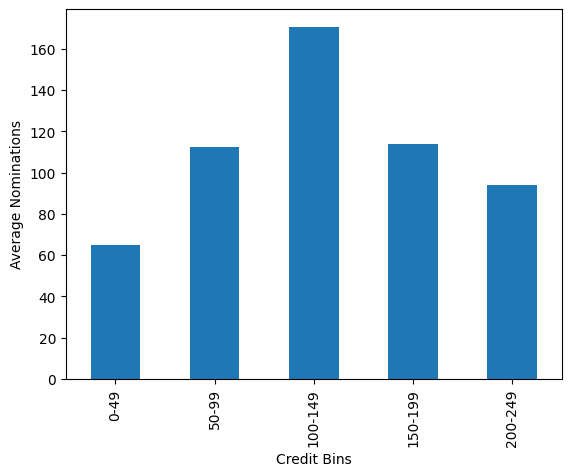

In [100]:
import matplotlib.pyplot as plt
# Шаг 1: Используйте функцию `cut` для группировки актеров по общему количеству кредитов в бины по 50. 
# Создайте новый столбец "credit_bins" с помощью функции `cut`, указав столбец общего количества кредитов и списки границ бинов.
bins = range(0, df['total_credits'].max()+50, 50)
labels = ["{}-{}".format(b, b+49) for b in bins[:-1]]
df['credit_bins'] = pd.cut(df['total_credits'], bins=bins, labels=labels)

# Шаг 2: Используйте функцию `groupby` для группировки данных по столбцу "credit_bins" и вычисления среднего числа номинаций для каждого бина.

grouped_avg_nominations = df.groupby('credit_bins')['nominations'].mean()

# Шаг 3: Представьте результат в виде графика, например, столбчатой диаграммы.
grouped_avg_nominations.plot(kind='bar', xlabel='Credit Bins', ylabel='Average Nominations')
plt.show()


<div class='exercise'><b> Упражнение 2.6: Исследование соотношения возраста и зарплаты</b>.

Одним из интересных вопросов является исследование зависимости возраста от зарплаты:

- существует ли пиковый возраст, в котором достигается наибольшая зарплата; 
- платят ли пожилым актерам меньше? 

Чтобы ответить на эти вопросы, необходимо сначала извлечь возраст из даты рождения. Это можно сделать, преобразовав дату рождения в объект datetime.

Подробнее об объектах datetime: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html .

</div>

# схитрим и сконкатенируем эти данные в отдельной ячейке. но год у нас имеет тип инт, поэтому сделаем его строкой на время операции

In [101]:
# добавим пробел 
df['full_birth_date'] = df['birth_date'] +  ' ' + df['birth_year'].astype(str)


In [102]:
df[['full_birth_date']].head()

,full_birth_date
0,June 5 1971
1,May 2 1972
2,July 18 1967
3,September 9 1966
4,April 7 1954


In [103]:
df['full_birth_date'] = pd.to_datetime(df['full_birth_date'], format='%B %d %Y')

Сейчас возраст можно посчитать более точно

In [104]:
from datetime import datetime

# Получение текущей даты
current_date = datetime.now()

# Вычисление возраста
df['age'] = (current_date - df['full_birth_date']).astype('<m8[Y]')

Теперь мы исследуем статистику возраста.

In [105]:
df["age"].describe()

count    30.000000
mean     51.100000
std      10.124569
min      32.000000
25%      44.500000
50%      52.000000
75%      56.000000
max      74.000000
Name: age, dtype: float64

Кто самый старший актер?
в данном случае мужчина

In [106]:
# find the actor/actress associated with oldest age
oldest_actor = df.loc[(df['sex'] == 'male') & (df['age'] == df['age'].max())]
oldest_actor

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,...,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits,credit_bins,full_birth_date
12,Samuel L. Jackson,male,Actor,30.5,https://www.imdb.com/name/nm0000168/,https://www.imdb.com/name/nm0000168/bio/?ref_=...,December 21,1948,"Washington D.C., USA",Samuel Leroy Jackson,...,74.0,48,95,12,208,0,6,226,200-249,1948-12-21


Кто самая старшая женщина из актрисс?

In [107]:
actress = df.loc[(df['sex'] =='female')]
oldest_actress =actress.loc[actress['age'] == actress['age'].max()]
oldest_actress

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,...,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits,credit_bins,full_birth_date
28,Julia Roberts,female,Actress,12.0,https://www.imdb.com/name/nm0000210/,https://www.imdb.com/name/nm0000210/bio/?ref_=...,October 28,1967,"Smyrna, Georgia, USA",Julia Fiona Roberts,...,55.0,61,114,12,68,0,5,85,50-99,1967-10-28


Кто самый молодой актер?

In [108]:
df.loc[(df['age'] == df['age'].min())]


,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,...,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits,credit_bins,full_birth_date
16,Jennifer Lawrence,female,Actress,24.0,https://www.imdb.com/name/nm2225369/,https://www.imdb.com/name/nm2225369/bio/?ref_=...,August 15,1990,"Louisville, Kentucky, USA",Jennifer Shrader Lawrence,...,32.0,120,192,6,38,0,7,51,50-99,1990-08-15


**Следите за результатами** Что вы замечаете о двух самых молодых актерах/актрисах?Что вы замечаете о самых старых?

In [120]:
df["age"].describe()

count    30.000000
mean     51.100000
std      10.124569
min      32.000000
25%      44.500000
50%      52.000000
75%      56.000000
max      74.000000
Name: age, dtype: float64

Самыми молодыми являются женщины, и имеют значительно меньше кредитов, чем самые старые, кто оказался мужчинами.

Но обратите внимание, что Дженнифер Лоуренс имеет больше побед, чем у Эммы Уотсон и Сэмюэля Джексона.

Как вы думаете, имеет смысл, что больше побед/награды коррелирует с более высокой зарплатой?

Давайте посмотрим немного дальше в возрастном диапазоне, расщепляя возраст квартилями в соответствии с данными.Мы можем сделать это с помощью встроенной функции Pandas .describe ().

In [119]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_9868/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,salary,birth_year,height,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits
salary,1.000000,-0.359072,0.274142,0.372404,-0.189113,-0.275908,0.655630,0.253857,0.517281,0.581822,0.537801
birth_year,-0.359072,1.000000,-0.074350,-0.998786,-0.139265,-0.032910,-0.529790,-0.686539,-0.050718,-0.245549,-0.746905
height,0.274142,-0.074350,1.000000,0.078762,-0.219278,-0.257758,0.227965,0.260810,-0.056684,-0.021109,0.269817
age,0.372404,-0.998786,0.078762,1.000000,0.134215,0.018816,0.537276,0.672314,0.056972,0.249961,0.739686
wins,-0.189113,-0.139265,-0.219278,0.134215,1.000000,0.805379,0.043882,0.066492,-0.097450,-0.001143,0.062003
nominations,-0.275908,-0.032910,-0.257758,0.018816,0.805379,1.000000,-0.024036,-0.017995,-0.088915,0.079047,-0.010487
producer_credits,0.655630,-0.529790,0.227965,0.537276,0.043882,-0.024036,1.000000,0.322141,0.336590,0.586367,0.702178
actors_credits,0.253857,-0.686539,0.260810,0.672314,0.066492,-0.017995,0.322141,1.000000,-0.006200,0.074939,0.880820
composers_credits,0.517281,-0.050718,-0.056684,0.056972,-0.097450,-0.088915,0.336590,-0.006200,1.000000,0.820823,0.290436
soundtrack_credits,0.581822,-0.245549,-0.021109,0.249961,-0.001143,0.079047,0.586367,0.074939,0.820823,1.000000,0.463715


исходя из корреляций мы видим, что с заработной платой больше всего корелирует(из цифр) 
- produser_credits

как ни странно, никак не отражаются победы и номинации..

нужно посмотреть категориальные столбцы, кто зарабатывает больше, мужчины или женщины?

<div class='exercise'><b>  Исследование соотношения зарплаты и пола</b>.

Теперь рассмотрим зависимость зарплаты от пола. Это может быть полезно для выявления возможных гендерных предубеждений.

</div>

In [121]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='salary'>

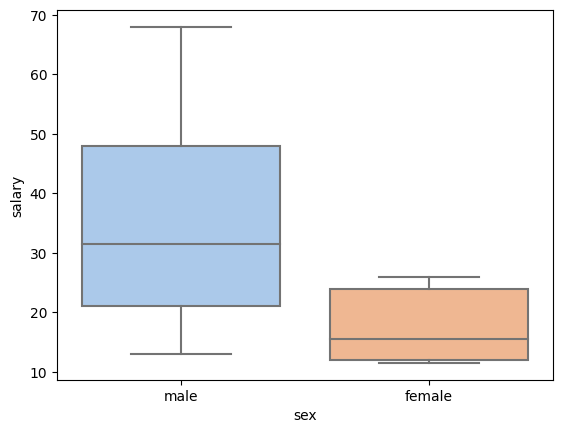

In [125]:
sns.boxplot(x="sex", y="salary", palette='pastel', data=df)

мужчины зарабатывают гораздо больше! а что на счет того, кето больше выигрывает номинаций,

<Axes: xlabel='sex', ylabel='wins'>

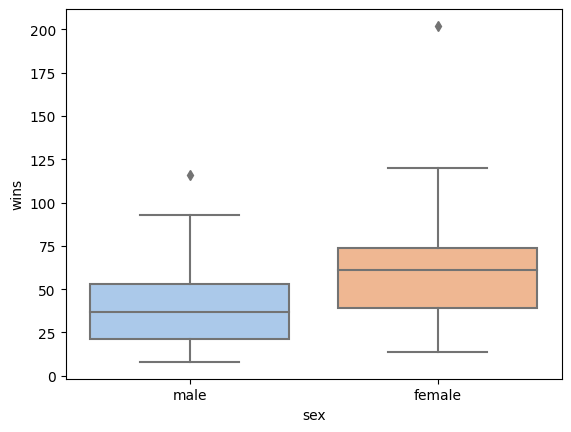

In [124]:
sns.boxplot(x="sex", y="wins", data=df, palette='pastel')

В целом, женщины побеждают больше и в целом больше номинируются на различные награды

<Axes: xlabel='sex', ylabel='nominations'>

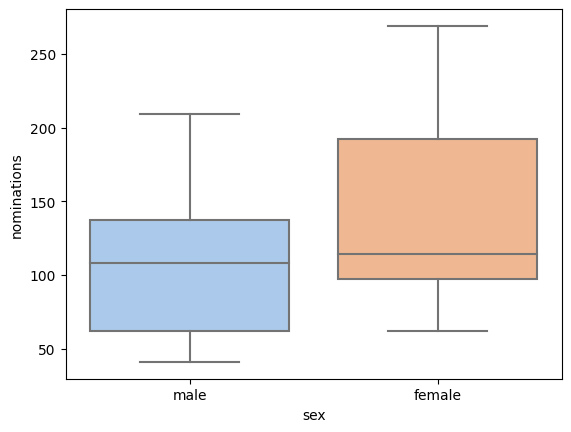

In [126]:
sns.boxplot(x="sex", y="nominations", data=df, palette='pastel')

In [127]:
df[['age', 'nominations', 'wins']].corr()

,age,nominations,wins
age,1.000000,0.018816,0.134215
nominations,0.018816,1.000000,0.805379
wins,0.134215,0.805379,1.000000


Никак от возраста не зависит количество побед, но чем больше актеры номинируются, тем больше у них шанс выиграть это логично

<Axes: ylabel='sex'>

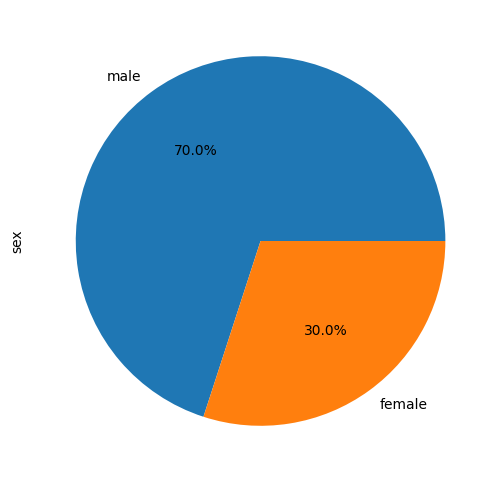

In [138]:
# А какой процент вообще мужчин в топе актеров а какой женщин?
df['sex'].value_counts(normalize=True).plot.pie(figsize=(6,6), autopct='%1.1f%%')

30 процентов женщин, интересно а эти 30 процентов женщин суммарно какой проуцент наград получили?

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df[['reading']], bins=50, ax=plt.subplot(121), palette='pastele')
sns.histplot(df[['math']], bins=50, ax=plt.subplot(122), palette='pastele');

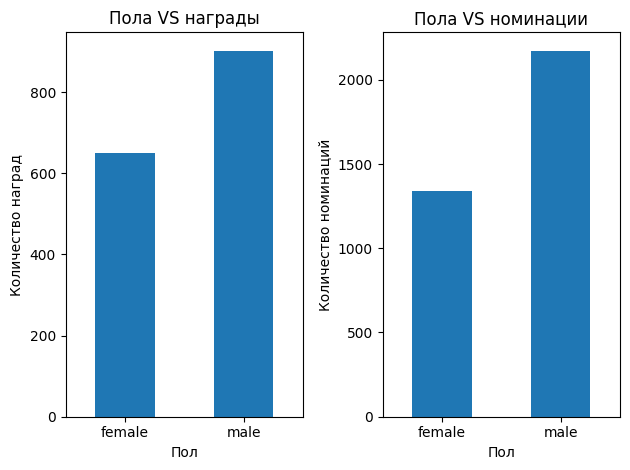

In [146]:
# Группировка данных по полу и суммирование количества наград и номинаций
grouped1 = df.groupby('sex')['wins'].sum()
grouped2 = df.groupby('sex')['nominations'].sum()

# Создание гистограммы
ax1 = plt.subplot(121)
grouped1.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество наград')
ax1.set_title('Пола VS награды')

ax2 = plt.subplot(122)
grouped2.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Пол')
ax2.set_ylabel('Количество номинаций')
ax2.set_title('Пола VS номинации')

# Установка красивых меток оси X
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

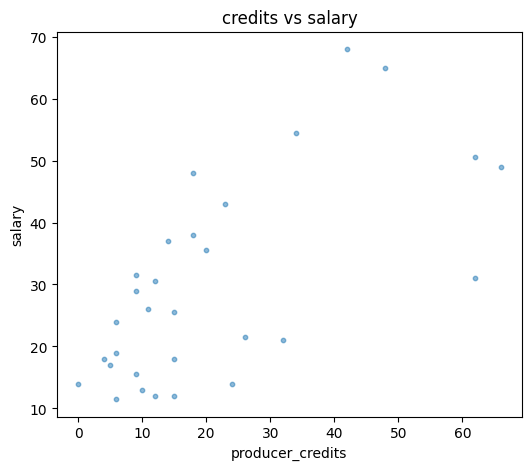

In [133]:
df.plot.scatter(x='producer_credits', y='salary', s=10, alpha=.5, figsize=(6,5))
plt.title('credits vs salary');

Не сильно линейная зависимоть, тем не менее, вороятность того, что зарабатывают больше, те кто продюссирует, гораздо выше

На основе этой квартильной сводной статистики мы определили возрастные группы бинов.

In [110]:
quartile_1 = df[df.age <= 41]
quartile_2 = df[(df.age > 41) & (df.age <=49)]
quartile_3 = df[(df.age >49) & (df.age <=53)]
quartile_4 = df[df.age >53]


<Axes: xlabel='age', ylabel='salary'>

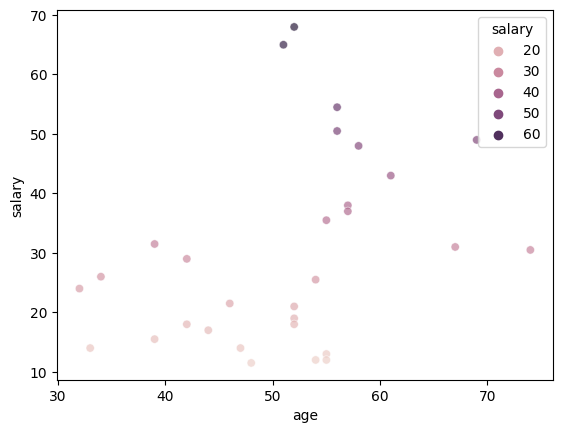

In [151]:
sns.scatterplot(data=df, x='age', y='salary', hue='salary', marker='o', lw=.7, alpha=.7)


ну при просмотре графика распределения  мы видим, что большие зп у людей старше 50, а точнее от 50 до 55 примерно достигается какой то пик зп 

В среднем такая же статистика

In [155]:
# look at mean salary within each age quartile
# quartile_1 = df[df.age <= 41]
# quartile_2 = df[(df.age > 41) & (df.age <=49)]
# quartile_3 = df[(df.age >49) & (df.age <=53)]
# quartile_4 = df[df.age >53]
display(quartile_1.salary.mean())
display(quartile_2.salary.mean())
display(quartile_3.salary.mean())
display(quartile_4.salary.mean())

22.2

18.5

38.2

34.25

Мы видим, что во втором квартиле (возраст 42-49 лет) средняя заработная плата выше, чем в третьем (возраст 50-53 года), однако в четвертом квартиле она по-прежнему самая высокая (возраст 54-71 год). 
Почему так происходит?
в среднем актеры и актриссы в этом возрасте зарабатывают больше, но есть несколько человек, которые вероятно, продюссеры, которые зарабытывают больше всех, 
поэтому средняя статистика отличается от суммарной или от статистики распределения фактических заработных плат

Что вы замечаете из этой статистики?
Похоже, что женщины имеют более низкую зарплату во всех трех сводных статистических данных.Как вы думаете, почему это?
Как вы думаете, есть ли другие факторы, которые могут повлиять на это?Если так, то что еще в данных может быть показательным?

Также может быть полезно дополнительно посмотреть среднее общее количество кредитов на пол.

<Axes: xlabel='sex', ylabel='total_credits'>

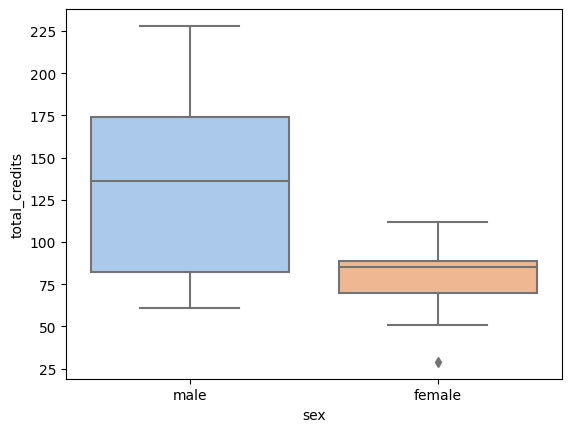

In [156]:
sns.boxplot(x="sex", y="total_credits", data=df, palette='pastel')


Обратите внимание, что, хотя женщины имеют более низкую среднюю зарплату, чем у мужчин, у них также, как правило, меньше кредитов.Это говорит нам кое -что о том, как количество кредитов коррелирует с зарплатой? Как вы могли бы исследовать это дальше?

<div class = 'упражнение'> <b> Упражнение 2.8: Изучение наград по полу </b>

У какой актрисы больше всего победы?
Сколько у нее побед?
У какого актера больше всего победы?
Сколько у него побед?

</div>

In [157]:
df.loc[df['wins'] == df.wins.max]

,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,...,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits,credit_bins,full_birth_date
27,Cate Blanchett,female,Actress,12.0,https://www.imdb.com/name/nm0000949/,https://www.imdb.com/name/nm0000949/bio/?ref_=...,May 14,1969,"Melbourne, Victoria, Australia",Catherine Elise Blanchett,...,54.0,202,269,15,95,0,2,112,100-149,1969-05-14


Для начала посмотрим на максимальное количество побед. Это женщина Кейт Бланшет

# какое максимальное количсетво наград выиграл мужчина?


In [161]:
male = df.loc[df['sex'] == 'male']
male.loc[male['wins'] == male.wins.max()]


,actors_name,sex,position,salary,url,short_bio_url,birth_date,birth_year,place_of_birth,birth_name,...,age,wins,nominations,producer_credits,actors_credits,composers_credits,soundtrack_credits,total_credits,credit_bins,full_birth_date
7,Shah Rukh Khan,male,Actor,38.0,https://www.imdb.com/name/nm0451321/,https://www.imdb.com/name/nm0451321/bio/?ref_=...,November 2,1965,"New Delhi, India",No data available,...,57.0,116,138,18,111,0,9,138,100-149,1965-11-02


<div class = 'Упражнение'> <b> Упражнение 2.9: Изучение наград по полу, часть II </b>

Какое значение является средним числом побед для актера/актрисы с менее чем 65 actors_credits ?С большим или равным 65 кредитам актера?

</div>

In [164]:
act_cred_65 = df.loc[df.actors_credits <65]
act_cred_65['wins'].mean()

41.8

In [165]:
act_cred_high = df.loc[df.actors_credits >=65]
act_cred_high['wins'].mean()

56.75

<div class = 'Упражнение'> <b> Упражнение 2.10: Изучение кредитов композитора </b>

Сколько актеров/актрис имеют как минимум 1 кредит композитора?

</div>

In [167]:
len(df.loc[df.composers_credits > 1])

2